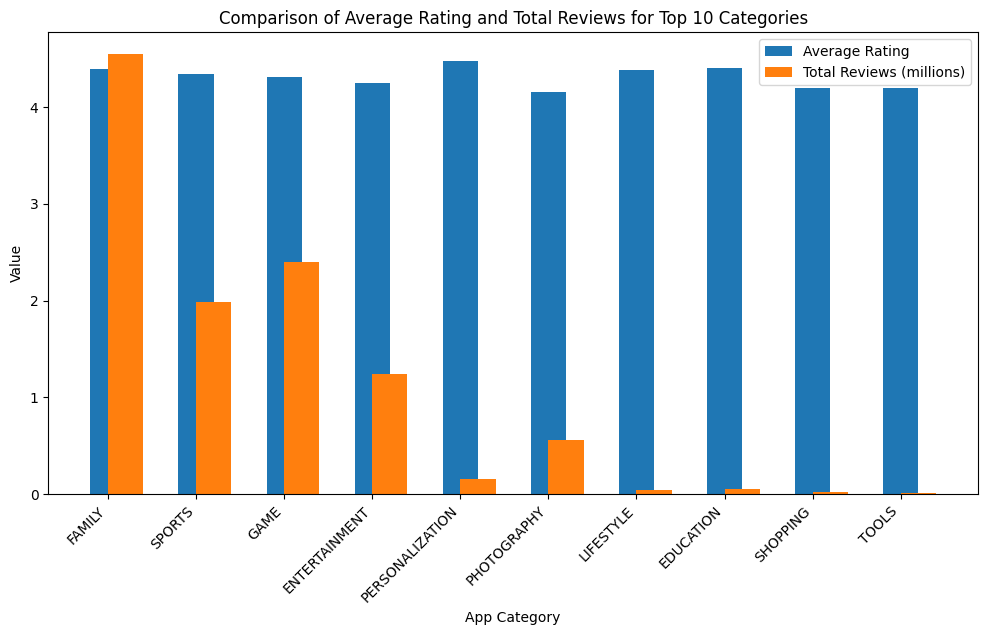

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
import os


data_file_path = 'Play Store Data.csv'

if not os.path.exists(data_file_path):
    raise FileNotFoundError(f"Dataset not found at {data_file_path}. Please check the file path.")


play_store_data = pd.read_csv(data_file_path)


play_store_data = play_store_data.dropna(subset=['Rating', 'Size', 'Installs', 'Last Updated', 'Reviews'])


def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1e6
        elif 'K' in size:
            return float(size.replace('K', '')) * 1e3
    return None

play_store_data['Size'] = play_store_data['Size'].apply(convert_size)

def clean_installs(value):
    value = str(value).replace(',', '').replace('+', '')  # Remove commas and plus signs
    return float(value) if value.isnumeric() else None  # Convert to float if numeric

play_store_data['Installs'] = play_store_data['Installs'].apply(clean_installs)


play_store_data = play_store_data.dropna(subset=['Installs'])


play_store_data['Reviews'] = pd.to_numeric(play_store_data['Reviews'], errors='coerce')


play_store_data['Last Updated'] = pd.to_datetime(play_store_data['Last Updated'], errors='coerce')


filtered_data = play_store_data[
    (play_store_data['Rating'] >= 4.0) &
    (play_store_data['Size'] >= 10e6) &
    (play_store_data['Last Updated'].dt.month == 1)
]


category_stats = filtered_data.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum'),
    total_installs=('Installs', 'sum')
).reset_index()


top_10_categories = category_stats.nlargest(10, 'total_installs')


ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist).time()
start_time = datetime.time(15, 0, 0)
end_time = datetime.time(23, 0, 0)

if start_time <= current_time <= end_time:
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    categories = top_10_categories['Category']
    x = range(len(categories))
    
    ax.bar(x, top_10_categories['avg_rating'], width=0.4, label='Average Rating', align='center')
    ax.bar(x, top_10_categories['total_reviews'] / 1e6, width=0.4, label='Total Reviews (millions)', align='edge')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_xlabel('App Category')
    ax.set_ylabel('Value')
    ax.set_title('Comparison of Average Rating and Total Reviews for Top 10 Categories')
    ax.legend()
    plt.show()
else:
    print('Graph is only available between 3 PM IST and 5 PM IST.')
